# Clustering Evidence of Streetlights and Crime

*NOTE:* The following maps are approximately to scale of one another

In [48]:
#%% Packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

#%pylab notebook
#pylab.rcParams['figure.figsize'] = (12, 12)
#%matplotlib notebook

#%% Locations
Windows = 'C:/Users/Sade/Documents/GitHub/lights-and-crime/Lights and Crime Garrett/Data'
Linux = '/home/sade/Desktop/Git Cloned Repos/lights-and-crime/Lights and Crime Garrett/Data'

choice = Windows

In [2]:
%matplotlib notebook

In [46]:
#%% EDA Data
L_full = pd.read_excel(choice + '/Final_Lights.xlsx')
L_yesCR_dup_only = pd.read_excel(choice + '/Rampage.xlsx')
Crimes = pd.read_excel(choice + '/crimes.xlsx')

So far, our preliminary results have shown there to be generally little to no impact on crime by street light outages.  However, there is some clustering evidence to support the hypothesis that streetlight outages, under particular environmental conditions, might impact crime.  I will proceed by comparing evidence across two areas: the Georgetown Park Shopping area and the 6th Ward of DC.

## Case 1 - Control Comparison

<IPython.core.display.Javascript object>


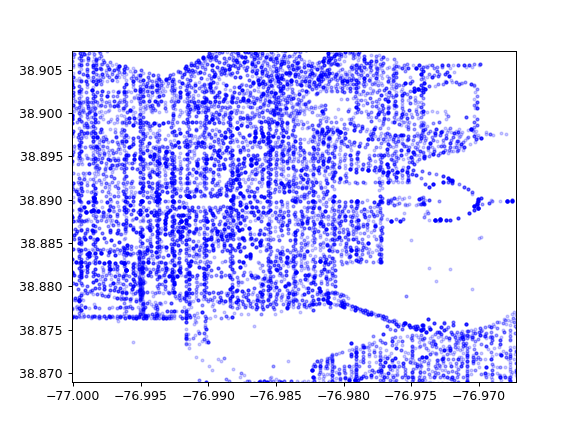

In [29]:
plt.figure(1)
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='b', s=20, marker='.', alpha=.2)

Let us begin by considering D.C.'s 6th Ward.  As you can see in Figure 1, here is a plot of the 6th Ward where the street light outages are plotted with denser outages relected in darker blue circles.

<IPython.core.display.Javascript object>


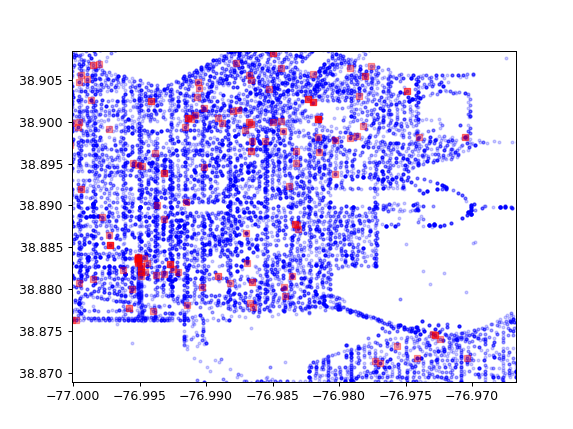

In [41]:
plt.figure(2)
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='b', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=20, marker='s', alpha=.2)

Now if we add an indicator for light outages that are tied with two or more crimes we see a relatively random scattering of crimes (red squares that become brighter the denser they are).  This information tells us little about the relationship between light outages and crime, but it might be what we expect under the assumption that the environmental factors are relatively uniform across street lights.

<IPython.core.display.Javascript object>


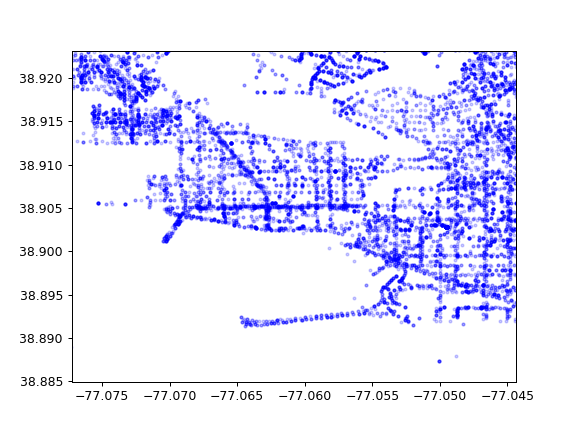

In [31]:
plt.figure(3)
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='b', s=20, marker='.', alpha=.2)

In contrast, let us take a look at Georgetown Park in Figure 3 and 4.

<IPython.core.display.Javascript object>


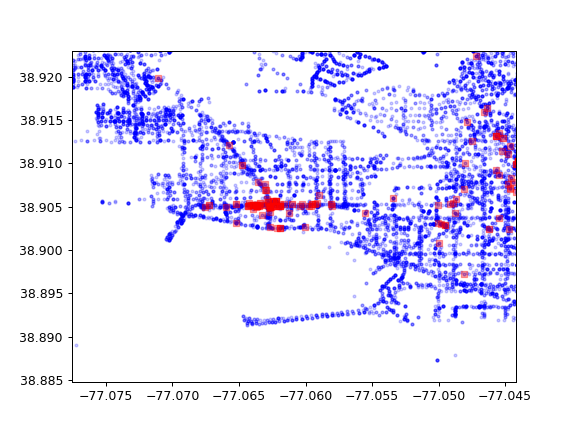

In [45]:
plt.figure(4)
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='b', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=20, marker='s', alpha=.2)

As can be seen, there is a stark clustering around the Georgetown Park shopping area.  This information shows that when a light goes out there is a higher likelyhood of multiple crimes being mapped to that light as opposed to the surrounding area.  This could be the outcome of two reasons that come to mind: first, it could be that there are simply many crimes comitted around this area as compared to other areas; second, it could be that we are seeing the outcomes of additional crimes in this area due to the effect of street lights going out.

<IPython.core.display.Javascript object>


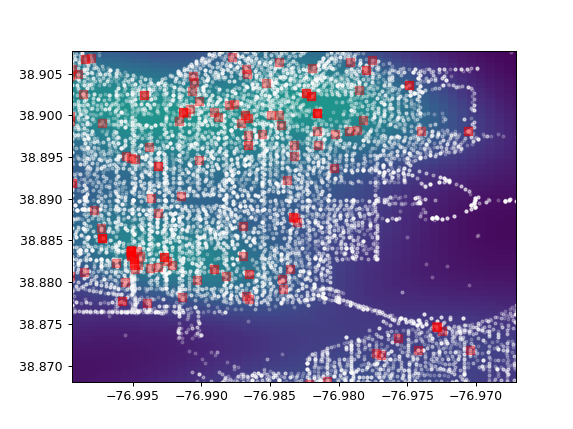

In [59]:
#Subset street light dataset
sub_CR = Crimes[["X","Y"]]

#Create data
x = sub_CR["X"]
y = sub_CR["Y"]

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
nbins=300
k = kde.gaussian_kde([x,y])
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

Let's try placing a heat map of crime underneath this information and look at these case studies again.

<IPython.core.display.Javascript object>


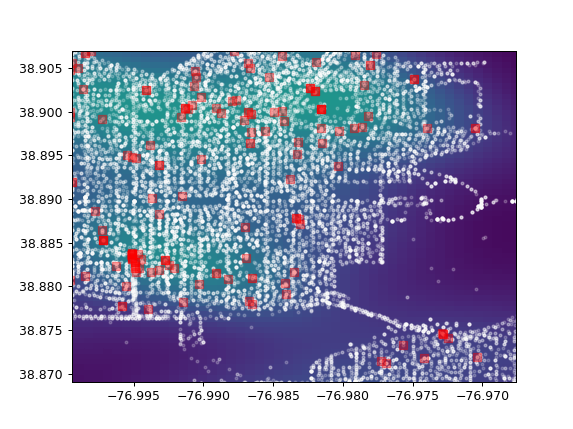

In [69]:
plt.figure(5)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=40, marker='s', alpha=.2)
plt.show()

<IPython.core.display.Javascript object>


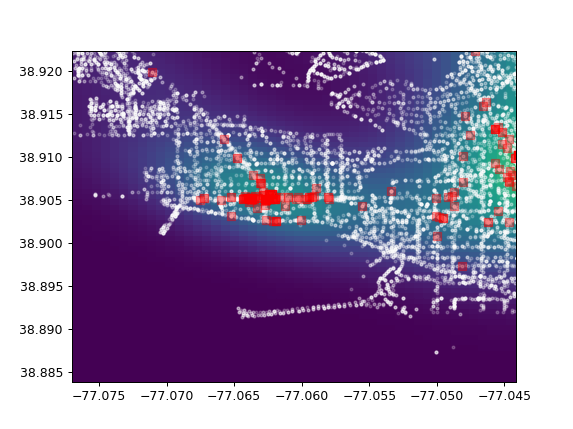

In [70]:
plt.figure(6)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=40, marker='s', alpha=.2)
plt.show()

Taking another look, we can see that the relative amount of crime taking place is similar across these two areas.  If the reason for Georgetown Park's clustering of crimes around streetlamps was due to the distribution of crime, then we should have seen the Georgetown Park area being much "hotter" than the 6th Ward area.  This leaves the plausibility of light outages in that area, perhaps because the area is darker at night, as one possible reason.

Finally, here's just an example of Chinatown as a "hot" area in Figure 7.  As you can see it is interesting that "cool" Georgetown has a similar crime clustering to an area as "hot" as Chinatown.

<IPython.core.display.Javascript object>


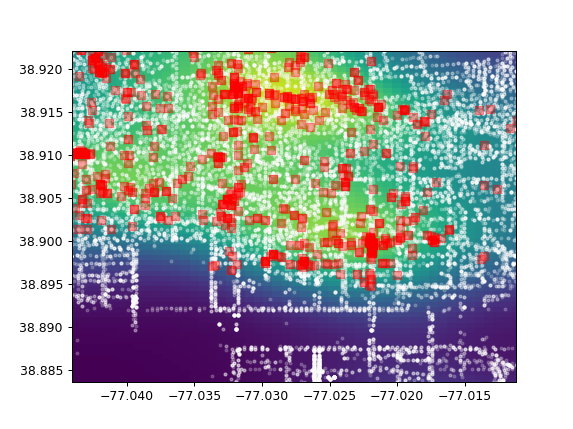

In [71]:
plt.figure(7)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.scatter(L_full['gpsX_CR'], L_full['gpsY_CR'], color='w', s=20, marker='.', alpha=.2)
plt.scatter(L_yesCR_dup_only['gpsX_left'], L_yesCR_dup_only['gpsY_left'], color='r', s=40, marker='s', alpha=.2)
plt.show()